# =========================NLP=============================
## Sentiment Analysis or Emotion Mining on Amazon Product Samsung Galaxy S22 5G

### Importing Libaries required for getting data from Amazon 

In [1]:
import requests 
from bs4 import BeautifulSoup as bs
import re
import pandas as pd

### Creating Dataset for Analysis

In [2]:
Samsung_mob=[]

In [3]:
for i in range (1,26):
    ip=[]
    url ="https://www.amazon.in/Samsung-Galaxy-Storage-Additional-Exchange/product-reviews/B09SH9D45B/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    Samsung_mob = Samsung_mob+ip

In [4]:
with open("realme.txt","w",encoding = 'utf-8') as output:
    output.write(str(Samsung_mob))

In [5]:
Samsung_mob

["\nPros-1-Its size(For who likes compact mobiles)2-Camera(superb in class)3-Display-Best in class bright and vivid definitely you will love it4-Touch -fluid.. definitely you will feel it(Previously used one plus9 but S22 is best -compare to oxygen os liked the Samsung oneUI )5-Os- definitely Samsung improved a lotCons-1- Battery backup-medium(If you are a hard core gamer and watch out content most of the time it will give SOT of around 5 hrs) So please think of it2- Heating issue is there but not much3-with out any screen protector finger id working fine..If you apply 3rd party screen protector then it will be little problematic for finger print authentication better to purchase screen protector from Samsung authorised website or else use face I'd it's working fineOver allThis mobile is for those who love compact mobilesNote-If they given 4200 mah battery then it's the beast in this price rangeNeed to improve heat management\n",
 "\nI didn't upgrade to iphone 14 coz of third class lig

### Importing all the required libraries we used in NLP 

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import string
from nltk.corpus import stopwords
from nltk import tokenize
import spacy
from spacy.lang.en import English
import nltk
import os
os.getcwd()

## Text Preprocessing 

###  1. Joining the list into one string/text

In [9]:
reviews = " ".join(Samsung_mob)

In [10]:
reviews

'\nPros-1-Its size(For who likes compact mobiles)2-Camera(superb in class)3-Display-Best in class bright and vivid definitely you will love it4-Touch -fluid.. definitely you will feel it(Previously used one plus9 but S22 is best -compare to oxygen os liked the Samsung oneUI )5-Os- definitely Samsung improved a lotCons-1- Battery backup-medium(If you are a hard core gamer and watch out content most of the time it will give SOT of around 5 hrs) So please think of it2- Heating issue is there but not much3-with out any screen protector finger id working fine..If you apply 3rd party screen protector then it will be little problematic for finger print authentication better to purchase screen protector from Samsung authorised website or else use face I\'d it\'s working fineOver allThis mobile is for those who love compact mobilesNote-If they given 4200 mah battery then it\'s the beast in this price rangeNeed to improve heat management\n \nI didn\'t upgrade to iphone 14 coz of third class ligh

### 2.Removing punctuation, numbers and special characters  from the string or text and convet text into lower letters

In [12]:
reviews = re.sub("[^A-Za-z" "]+"," ",reviews).lower()
reviews =re.sub("[0-9" "]+"," ",reviews)

In [13]:
reviews

' pros its size for who likes compact mobiles camera superb in class display best in class bright and vivid definitely you will love it touch fluid definitely you will feel it previously used one plus but s is best compare to oxygen os liked the samsung oneui os definitely samsung improved a lotcons battery backup medium if you are a hard core gamer and watch out content most of the time it will give sot of around hrs so please think of it heating issue is there but not much with out any screen protector finger id working fine if you apply rd party screen protector then it will be little problematic for finger print authentication better to purchase screen protector from samsung authorised website or else use face i d it s working fineover allthis mobile is for those who love compact mobilesnote if they given mah battery then it s the beast in this price rangeneed to improve heat management i didn t upgrade to iphone coz of third class lightening port instead of usb ci was looking for 

###  Remove Punctuations 

In [14]:
no_punc_text=reviews.translate(str.maketrans('','',string.punctuation))
no_punc_text

' pros its size for who likes compact mobiles camera superb in class display best in class bright and vivid definitely you will love it touch fluid definitely you will feel it previously used one plus but s is best compare to oxygen os liked the samsung oneui os definitely samsung improved a lotcons battery backup medium if you are a hard core gamer and watch out content most of the time it will give sot of around hrs so please think of it heating issue is there but not much with out any screen protector finger id working fine if you apply rd party screen protector then it will be little problematic for finger print authentication better to purchase screen protector from samsung authorised website or else use face i d it s working fineover allthis mobile is for those who love compact mobilesnote if they given mah battery then it s the beast in this price rangeneed to improve heat management i didn t upgrade to iphone coz of third class lightening port instead of usb ci was looking for 

### 3.Text Tokenization

In [64]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vikra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vikra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['pros', 'its', 'size', 'for', 'who', 'likes', 'compact', 'mobiles', 'camera', 'superb', 'in', 'class', 'display', 'best', 'in', 'class', 'bright', 'and', 'vivid', 'definitely', 'you', 'will', 'love', 'it', 'touch', 'fluid', 'definitely', 'you', 'will', 'feel', 'it', 'previously', 'used', 'one', 'plus', 'but', 's', 'is', 'best', 'compare', 'to', 'oxygen', 'os', 'liked', 'the', 'samsung', 'oneui', 'os', 'definitely', 'samsung']


In [18]:
len(text_tokens)

6195

### 4. Removing Stop-words from text tokens

In [20]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['i','the','it','A','s','is','k']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['pros', 'size', 'likes', 'compact', 'mobiles', 'camera', 'superb', 'class', 'display', 'best', 'class', 'bright', 'vivid', 'definitely', 'love', 'touch', 'fluid', 'definitely', 'feel', 'previously', 'used', 'one', 'plus', 'best', 'compare', 'oxygen', 'os', 'liked', 'samsung', 'oneui', 'os', 'definitely', 'samsung', 'improved', 'lotcons', 'battery', 'backup', 'medium', 'hard', 'core', 'gamer', 'watch', 'content', 'time', 'give', 'sot', 'around', 'hrs', 'please', 'think', 'heating', 'issue', 'much', 'screen', 'protector', 'finger', 'id', 'working', 'fine', 'apply', 'rd', 'party', 'screen', 'protector', 'little', 'problematic', 'finger', 'print', 'authentication', 'better', 'purchase', 'screen', 'protector', 'samsung', 'authorised', 'website', 'else', 'use', 'face', 'working', 'fineover', 'allthis', 'mobile', 'love', 'compact', 'mobilesnote', 'given', 'mah', 'battery', 'beast', 'price', 'rangeneed', 'improve', 'heat', 'management', 'upgrade', 'iphone', 'coz', 'third', 'class', 'lightenin

### 5.Lemmatization
It’s better than stemming, as it considers the context of the words and converts it into correct spellings and meanings. For ex: wasting -> waste

In [21]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(no_stop_tokens))
print(doc)

pros size likes compact mobiles camera superb class display best class bright vivid definitely love touch fluid definitely feel previously used one plus best compare oxygen os liked samsung oneui os definitely samsung improved lotcons battery backup medium hard core gamer watch content time give sot around hrs please think heating issue much screen protector finger id working fine apply rd party screen protector little problematic finger print authentication better purchase screen protector samsung authorised website else use face working fineover allthis mobile love compact mobilesnote given mah battery beast price rangeneed improve heat management upgrade iphone coz third class lightening port instead usb ci looking compact flagship rare days bought galaxy z flip trust guys flip open screen size inches sell get samsung wow compact phone great camera amazing single hand usage battery life good single day usage medium usage want play games skip phone buy best compact android phone came

In [22]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['pro', 'size', 'like', 'compact', 'mobile', 'camera', 'superb', 'class', 'display', 'good', 'class', 'bright', 'vivid', 'definitely', 'love', 'touch', 'fluid', 'definitely', 'feel', 'previously', 'use', 'one', 'plus', 'good', 'compare', 'oxygen', 'os', 'like', 'samsung', 'oneui', 'os', 'definitely', 'samsung', 'improved', 'lotcon', 'battery', 'backup', 'medium', 'hard', 'core', 'gamer', 'watch', 'content', 'time', 'give', 'sot', 'around', 'hrs', 'please', 'think', 'heating', 'issue', 'much', 'screen', 'protector', 'finger', 'i', 'd', 'work', 'fine', 'apply', 'rd', 'party', 'screen', 'protector', 'little', 'problematic', 'finger', 'print', 'authentication', 'well', 'purchase', 'screen', 'protector', 'samsung', 'authorise', 'website', 'else', 'use', 'face', 'work', 'fineover', 'allthis', 'mobile', 'love', 'compact', 'mobilesnote', 'give', 'mah', 'battery', 'beast', 'price', 'rangeneed', 'improve', 'heat', 'management', 'upgrade', 'iphone', 'coz', 'third', 'class', 'lighten', 'port', 'in

In [23]:
clean_reviews=' '.join(lemmas)
clean_reviews

'pro size like compact mobile camera superb class display good class bright vivid definitely love touch fluid definitely feel previously use one plus good compare oxygen os like samsung oneui os definitely samsung improved lotcon battery backup medium hard core gamer watch content time give sot around hrs please think heating issue much screen protector finger i d work fine apply rd party screen protector little problematic finger print authentication well purchase screen protector samsung authorise website else use face work fineover allthis mobile love compact mobilesnote give mah battery beast price rangeneed improve heat management upgrade iphone coz third class lighten port instead usb ci look compact flagship rare day buy galaxy z flip trust guy flip open screen size inch sell get samsung wow compact phone great camera amazing single hand usage battery life good single day usage medium usage want play game skip phone buy good compact android phone camera awesome battery life conc

# Feature Extraction

### A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. BOW count vectorizer creates a matrix of features by assigning separate column for each word and each row corresponds to a review text. 

### Using Countvectorizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [28]:
print(cv.vocabulary_)

{'pro': 672, 'size': 798, 'like': 487, 'compact': 159, 'mobile': 535, 'camera': 115, 'superb': 868, 'class': 145, 'display': 230, 'good': 358, 'bright': 98, 'vivid': 959, 'definitely': 206, 'love': 501, 'touch': 911, 'fluid': 329, 'feel': 315, 'previously': 668, 'use': 945, 'one': 581, 'plus': 650, 'compare': 162, 'oxygen': 610, 'os': 596, 'samsung': 755, 'oneui': 583, 'improved': 423, 'lotcon': 499, 'battery': 75, 'backup': 65, 'medium': 524, 'hard': 378, 'core': 181, 'gamer': 345, 'watch': 966, 'content': 178, 'time': 902, 'give': 356, 'sot': 829, 'around': 43, 'hrs': 402, 'please': 648, 'think': 895, 'heating': 386, 'issue': 449, 'much': 549, 'screen': 764, 'protector': 684, 'finger': 322, 'work': 991, 'fine': 320, 'apply': 41, 'rd': 703, 'party': 615, 'little': 491, 'problematic': 674, 'print': 671, 'authentication': 51, 'well': 974, 'purchase': 686, 'authorise': 52, 'website': 970, 'else': 261, 'face': 300, 'fineover': 321, 'allthis': 15, 'mobilesnote': 536, 'mah': 506, 'beast': 7

In [29]:
print(cv.get_feature_names()[150:300])

['cold', 'color', 'colorful', 'colour', 'combine', 'come', 'comfortable', 'comment', 'common', 'compact', 'company', 'comparatively', 'compare', 'competitive', 'competitor', 'complain', 'complete', 'component', 'con', 'concentrate', 'concern', 'condition', 'connected', 'connectivity', 'consider', 'constantly', 'consume', 'consumption', 'content', 'continue', 'convenient', 'core', 'corner', 'cost', 'could', 'course', 'coz', 'crash', 'crisp', 'crosse', 'cry', 'current', 'customer', 'customisable', 'customisation', 'daily', 'dark', 'day', 'dayson', 'daythis', 'deal', 'decent', 'decide', 'decision', 'decrease', 'default', 'definitely', 'deg', 'degrade', 'delay', 'deliver', 'delivery', 'dependable', 'depending', 'der', 'design', 'designdnt', 'designedgood', 'designer', 'detail', 'device', 'dex', 'difficult', 'direction', 'director', 'disappoint', 'disappointing', 'discharge', 'discount', 'dismal', 'display', 'displaycamera', 'displaycompact', 'dissatisfied', 'distortion', 'disturb', 'do', '

In [30]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
print(reviewscv.toarray().shape)

(3438, 1009)


In [32]:
reviewscv_array=reviewscv.toarray()
reviewscv_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### 2. CountVectorizer with N-grams (Bigrams & Trigrams)
### Occurance is lost in BOW count Vectorizer this is the major disadvantage. because of that text losses its contextuality. To overcome that using N-grams that preserve local ordering of words. N-grams can be Uni-grams (single word like ‘happy’), Bi-Grams (two words together like ‘totally disappointed’) and Tri-grams (three words together like ‘incomplete without service’)

In [65]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [66]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['also', 'amazing', 'android', 'app', 'around', 'awesome', 'backup', 'bad', 'battery', 'build', 'buy', 'camera', 'charge', 'charger', 'come', 'compact', 'con', 'could', 'day', 'design', 'device', 'display', 'drain', 'even', 'everything', 'face', 'fast', 'feature', 'feel', 'flagship', 'game', 'gen', 'get', 'give', 'go', 'good', 'great', 'hand', 'heat', 'heating', 'heavy', 'hour', 'hz', 'iphone', 'issue', 'know', 'last', 'less', 'life', 'like', 'long', 'look', 'love', 'mah', 'medium', 'min', 'mobile', 'much', 'need', 'one', 'os', 'overall', 'people', 'performance', 'phone', 'photo', 'please', 'premium', 'price', 'problem', 'quality', 'quite', 'really', 'review', 'samsung', 'say', 'screen', 'see', 'size', 'smooth', 'snapdragon', 'software', 'still', 'super', 'take', 'thing', 'think', 'time', 'top', 'ui', 'update', 'usage', 'use', 'user', 'want', 'week', 'well', 'work', 'would', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 

## 3. TF-IDF Vectorizer

### TF-IDF is used because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.TF-IDF vectorization involves calculating the TF-IDF score for every word in your corpus relative to that document and then putting that information into a vector.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [36]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['access', 'accord', 'accurate', 'adaptive', 'add', 'almost', 'along', 'already', 'also', 'although', 'always', 'amazing', 'amazon', 'android', 'anything', 'apart', 'app', 'apple', 'appleapple', 'approx', 'around', 'aspect', 'average', 'awesome', 'back', 'backup', 'bad', 'bahut', 'bank', 'battery', 'baugh', 'beautiful', 'behind', 'believe', 'big', 'bit', 'box', 'brand', 'bright', 'brightness', 'brilliant', 'bud', 'build', 'buttery', 'buy', 'cable', 'call', 'camera', 'capacity', 'capture', 'care', 'carry', 'case', 'casual', 'center', 'change', 'charge', 'charger', 'check', 'class', 'clean', 'clear', 'click', 'cold', 'color', 'come', 'comment', 'common', 'compact', 'company', 'compare', 'competitor', 'complete', 'con', 'consider', 'consume', 'content', 'continue', 'could', 'crash', 'customer', 'daily', 'day', 'decent', 'definitely', 'design', 'device', 'difficult', 'disappoint', 'disappointing', 'discount', 'display', 'do', 'doubt', 'drain', 'drawback', 'dynamic', 'easily', 'easy', 'edge

## Generate WordCloud
### Wordcloud representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

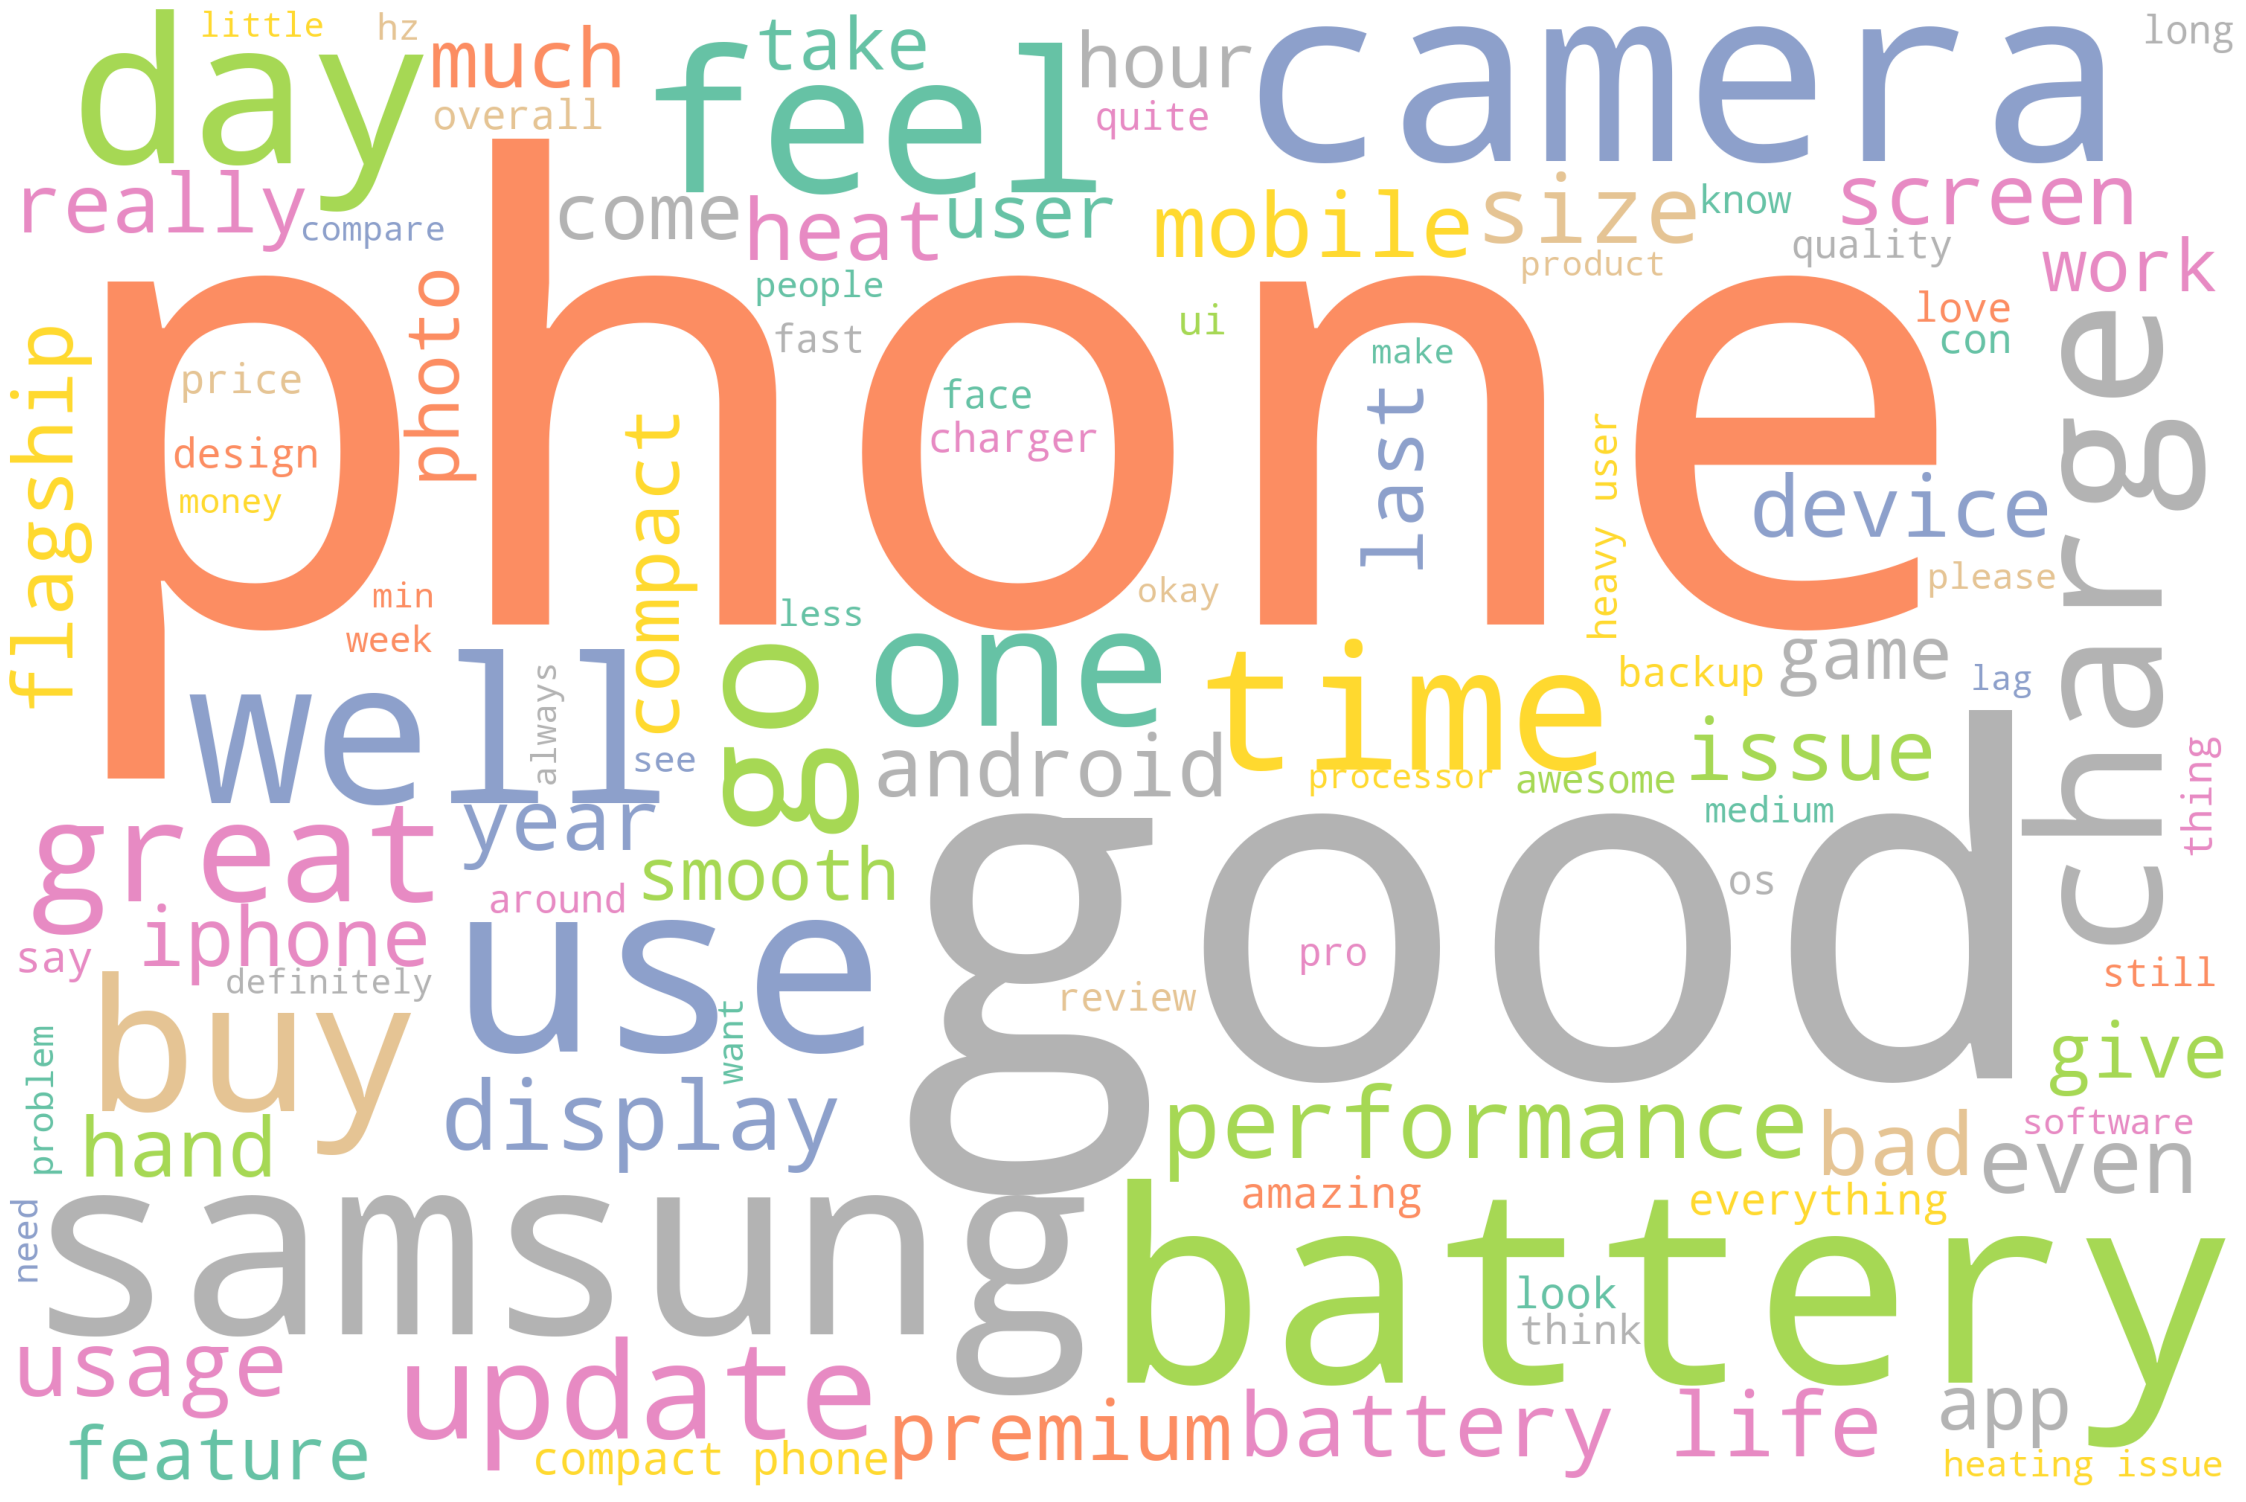

In [37]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

# Name Entity Recognition (NER)

### The named entity recognition (NER) is one of the most data preprocessing task. It involves the identification of key information in the text and classification into a set of predefined categories. An entity is basically the thing that is consistently talked about or refer to in the text. NER is the form of NLP.

In [39]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [40]:
for token in doc_block[100:200]:
    print(token,token.pos_)

class NOUN
lighten NOUN
port NOUN
instead ADV
usb NOUN
ci PROPN
look VERB
compact ADJ
flagship NOUN
rare ADJ
day NOUN
buy NOUN
galaxy VERB
z NOUN
flip PROPN
trust PROPN
guy NOUN
flip VERB
open ADJ
screen NOUN
size NOUN
inch NOUN
sell NOUN
get AUX
samsung PROPN
wow INTJ
compact ADJ
phone NOUN
great ADJ
camera NOUN
amazing ADJ
single ADJ
hand NOUN
usage NOUN
battery NOUN
life NOUN
good ADJ
single ADJ
day NOUN
usage NOUN
medium ADJ
usage NOUN
want NOUN
play NOUN
game NOUN
skip VERB
phone NOUN
buy NOUN
good ADJ
compact ADJ
android NOUN
phone NOUN
camera NOUN
awesome ADJ
battery NOUN
life NOUN
concern NOUN
may AUX
need VERB
charge NOUN
daily ADJ
normal ADJ
use NOUN
charger NOUN
headphone PROPN
jack PROPN
camera NOUN
sooooo NOUN
goood PROPN
charge NOUN
user NOUN
interface NOUN
call VERB
quality NOUN
everything PRON
good ADJ
charge NOUN
go VERB
hour NOUN
bit NOUN
worry NOUN
delivery NOUN
fraud NOUN
nothing PRON
like INTJ
happen VERB
receive VERB
original ADJ
product NOUN
good ADJ
condition NO

### Filtering the nouns and verbs only

In [41]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['charge', 'use', 'charger', 'camera', 'sooooo', 'charge', 'user', 'interface', 'call', 'quality', 'charge', 'go', 'hour', 'bit', 'worry', 'delivery', 'fraud', 'happen', 'receive', 'product', 'condition', 'baugh', 'sale', 'price', 'product', 'baugh', 'price', 'mah', 'battery', 'watt', 'charger', 'take', 'hour', 'charge', 'care', 'user', 'phone', 'feel', 'hand', 'good', 'camera', 'software', 'corner', 'camera', 'build', 'need', 'case', 'scratch', 'time', 'know', 'designer', 'think', 'build', 'shape', 'camera', 'quality', 'doubt', 'update', 'require', 'bit', 'lag', 'camera', 'access', 'capture', 'photo', 'take', 'photo', 'drawback', 's', 'size', 'flagship', 'mobile', 'work', 'generation', 'thanx', 'phone', 'get', 'phone', 'size', 'inch', 'display', 'camera', 'battery', 'life', 'day', 'year', 'huawei', 'feature', 'believe', 'phone', 'feel', 'price', 'iphone', 'phone', 'look', 'size', 'make', 'deal', 'use', 'window']


###  Counting the noun & verb tokens

In [44]:

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,140
1,battery,89
2,camera,51
3,use,48
4,day,32
5,charge,31
6,feel,30
7,buy,25
8,user,25
9,issue,24


###  Visualizing results (Barchart for top 10 nouns + verbs)

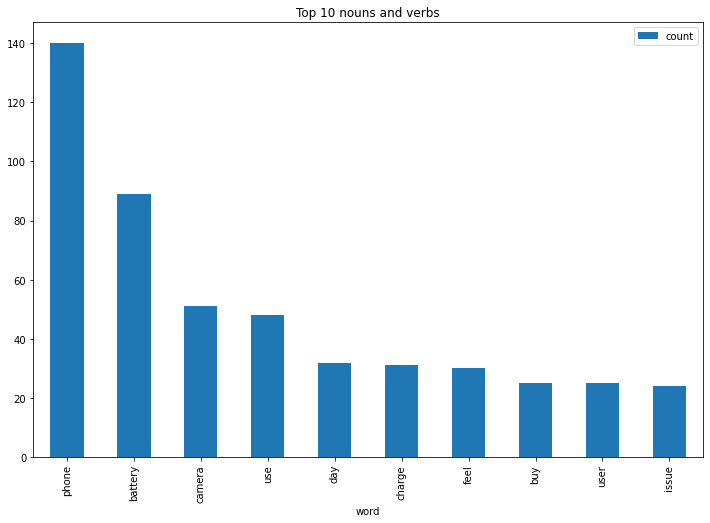

In [45]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Emotion Mining - Sentiment Analysis

In [47]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(Samsung_mob))
sentences

["\nPros-1-Its size(For who likes compact mobiles)2-Camera(superb in class)3-Display-Best in class bright and vivid definitely you will love it4-Touch -fluid.. definitely you will feel it(Previously used one plus9 but S22 is best -compare to oxygen os liked the Samsung oneUI )5-Os- definitely Samsung improved a lotCons-1- Battery backup-medium(If you are a hard core gamer and watch out content most of the time it will give SOT of around 5 hrs) So please think of it2- Heating issue is there but not much3-with out any screen protector finger id working fine..If you apply 3rd party screen protector then it will be little problematic for finger print authentication better to purchase screen protector from Samsung authorised website or else use face I'd it's working fineOver allThis mobile is for those who love compact mobilesNote-If they given 4200 mah battery then it's the beast in this price rangeNeed to improve heat management\n \nI didn't upgrade to iphone 14 coz of third class lighten

In [48]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,\nPros-1-Its size(For who likes compact mobile...
1,(medium usage)If you want to play games just S...
2,This is the very best compact Android phone.
3,Camera is awesome.
4,But battery life is a concern.
...,...
325,I will say that the stand-by time is brilliant...
326,Best suited for people who aren't behind their...
327,Not unbearable to hold (I use case) but yes is...
328,A common issue with most high performance phon...


In [50]:
# Emotion Lexicon - Affin
affin=pd.read_csv(r"C:\Users\vikra\OneDrive\Desktop\Data science\Afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [51]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

### Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence

In [52]:

nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [53]:
# manual testing
calculate_sentiment(text='good product')

3

In [54]:
calculate_sentiment(text='bad product')

-3

###  Calculating sentiment value for each sentence

In [55]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      40
1       1
2       3
3       4
4       0
       ..
325     4
326     0
327    -1
328     9
329     2
Name: sentiment_value, Length: 330, dtype: int64

### how many words are there in a sentence?

In [56]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      224
1       13
2        8
3        3
4        6
      ... 
325     11
326     28
327     13
328     63
329     18
Name: word_count, Length: 330, dtype: int64

In [57]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
9,I was bit worried about delivery frauds.,-7,7
242,Worst battery not even half day it will comes ...,-6,61
45,Used to hate Samsung for their sucky UI and bl...,-4,25
191,Worst smartphone by Samsung\n \nEverything ok ...,-3,14
99,Only problem in my opinion is the famous shutt...,-3,13
...,...,...,...
284,"Display is top notch, best HDR, good for OTT.O...",14,21
148,Like the build quality and camera experience.S...,16,28
322,Review after 1 week usage:What works:1) Incred...,20,94
34,Good phone\n \nIt might be really early for me...,23,167


###  Sentiment score of the whole review

In [58]:
sent_df['sentiment_value'].describe()

count    330.000000
mean       2.012121
std        3.932543
min       -7.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       40.000000
Name: sentiment_value, dtype: float64

### Negative sentiment score of the whole review

In [59]:
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
4,But battery life is a concern.,0,6
5,You may need to charge daily for the normal us...,-1,16
6,:(\n \nCamera was sooooo goood...,0,5
8,But the charge goes from 85 to 15 in 7 hours.,0,11
9,I was bit worried about delivery frauds.,-7,7
...,...,...,...
315,It has been a week since I received the phone ...,0,24
316,The battery capacity is 3700 mah.,0,6
320,U won't regret!,-2,3
326,Best suited for people who aren't behind their...,0,28


### Positive sentiment score of the whole review 

In [60]:
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,\nPros-1-Its size(For who likes compact mobile...,40,224
1,(medium usage)If you want to play games just S...,1,13
2,This is the very best compact Android phone.,3,8
3,Camera is awesome.,4,3
7,"Charging, user interface, call quality everyth...",3,8
...,...,...,...
323,"Smooth performance with no lag, I played Gensh...",3,86
324,If you game for over an hour in games like Gen...,2,20
325,I will say that the stand-by time is brilliant...,4,11
328,A common issue with most high performance phon...,9,63


In [61]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,\nPros-1-Its size(For who likes compact mobile...,40,224,0
1,(medium usage)If you want to play games just S...,1,13,1
2,This is the very best compact Android phone.,3,8,2
3,Camera is awesome.,4,3,3
4,But battery life is a concern.,0,6,4
...,...,...,...,...
325,I will say that the stand-by time is brilliant...,4,11,325
326,Best suited for people who aren't behind their...,0,28,326
327,Not unbearable to hold (I use case) but yes is...,-1,13,327
328,A common issue with most high performance phon...,9,63,328


C:\Users\vikra\VikramPY\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

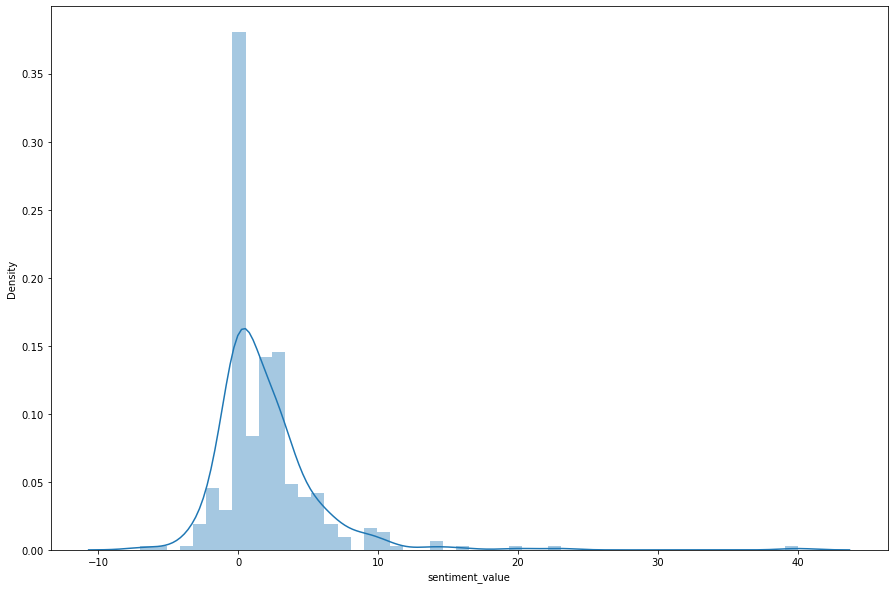

In [62]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

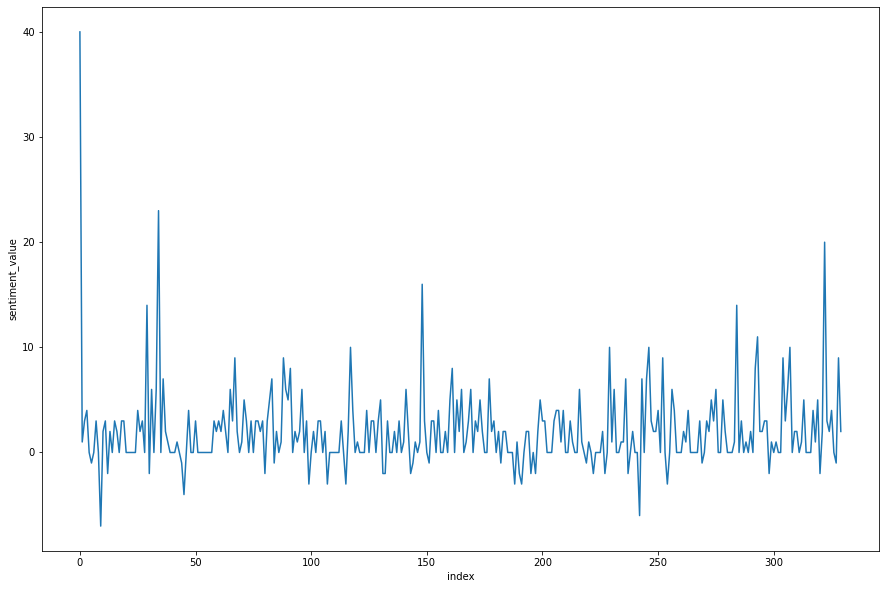

In [63]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

In [67]:
sent_df["sentiment_value"].unique()

array([40,  1,  3,  4,  0, -1, -7,  2, -2, 14,  6, 23,  7, -4,  9,  5,  8,
       -3, 10, 16, -6, 11, 20], dtype=int64)

In [71]:
sent_df["sentiment_value"].values

array([40,  1,  3,  4,  0, -1,  0,  3,  0, -7,  2,  3, -2,  2,  0,  3,  2,
        0,  3,  3,  0,  0,  0,  0,  0,  4,  2,  3,  0, 14, -2,  6,  0,  6,
       23,  0,  7,  2,  1,  0,  0,  0,  1,  0, -1, -4,  0,  4,  0,  0,  3,
        0,  0,  0,  0,  0,  0,  0,  3,  2,  3,  2,  4,  2,  0,  6,  3,  9,
        2,  0,  1,  5,  3,  0,  3,  0,  3,  3,  2,  3, -2,  3,  5,  7, -1,
        2,  0,  1,  9,  6,  5,  8,  0,  2,  1,  2,  6,  0,  3, -3,  0,  2,
        0,  3,  3,  0,  2, -3,  0,  0,  0,  0,  0,  3,  0, -3,  2, 10,  4,
        0,  1,  0,  0,  0,  4,  0,  3,  3,  0,  3,  5, -2, -2,  3,  0,  0,
        2,  0,  3,  0,  1,  6,  2, -2, -1,  1,  0,  1, 16,  3,  0, -1,  3,
        3,  0,  4,  0,  0,  2,  0,  5,  8,  0,  5,  2,  6,  0,  1,  3,  6,
        0,  3,  2,  5,  2,  0,  0,  7,  2,  3,  0,  2, -1,  2,  2,  0,  0,
        0, -3,  1, -2, -3,  0,  2,  2, -2,  0, -2,  2,  5,  3,  3,  0,  0,
        0,  3,  4,  4,  1,  4,  0,  0,  3,  1,  0,  0,  6,  1,  0, -1,  1,
        0, -2,  0,  0,  0

In [80]:
import numpy as np
sent_df["sentiment"]=pd.cut(np.array([40,  1,  3,  4,  0, -1,  0,  3,  0, -7,  2,  3, -2,  2,  0,  3,  2,
        0,  3,  3,  0,  0,  0,  0,  0,  4,  2,  3,  0, 14, -2,  6,  0,  6,
       23,  0,  7,  2,  1,  0,  0,  0,  1,  0, -1, -4,  0,  4,  0,  0,  3,
        0,  0,  0,  0,  0,  0,  0,  3,  2,  3,  2,  4,  2,  0,  6,  3,  9,
        2,  0,  1,  5,  3,  0,  3,  0,  3,  3,  2,  3, -2,  3,  5,  7, -1,
        2,  0,  1,  9,  6,  5,  8,  0,  2,  1,  2,  6,  0,  3, -3,  0,  2,
        0,  3,  3,  0,  2, -3,  0,  0,  0,  0,  0,  3,  0, -3,  2, 10,  4,
        0,  1,  0,  0,  0,  4,  0,  3,  3,  0,  3,  5, -2, -2,  3,  0,  0,
        2,  0,  3,  0,  1,  6,  2, -2, -1,  1,  0,  1, 16,  3,  0, -1,  3,
        3,  0,  4,  0,  0,  2,  0,  5,  8,  0,  5,  2,  6,  0,  1,  3,  6,
        0,  3,  2,  5,  2,  0,  0,  7,  2,  3,  0,  2, -1,  2,  2,  0,  0,
        0, -3,  1, -2, -3,  0,  2,  2, -2,  0, -2,  2,  5,  3,  3,  0,  0,
        0,  3,  4,  4,  1,  4,  0,  0,  3,  1,  0,  0,  6,  1,  0, -1,  1,
        0, -2,  0,  0,  0,  2, -2,  0, 10,  1,  6,  0,  0,  1,  1,  7, -2,
        0,  2,  0,  0, -6,  7,  0,  7, 10,  3,  2,  2,  4,  0,  9,  0, -3,
        0,  6,  4,  0,  0,  0,  2,  1,  4,  0,  0,  0,  0,  3, -1,  0,  3,
        2,  5,  3,  6,  0,  0,  5,  2,  0,  0,  0,  1, 14,  0,  3,  0,  1,
        0,  2,  0,  8, 11,  2,  2,  3,  3, -2,  1,  0,  1,  0,  0,  9,  3,
        6, 10,  0,  2,  2,  0,  1,  5,  0,  0,  0,  4,  1,  5, -2,  2, 20,
        3,  2,  4,  0, -1,  9,  2]),bins=[-40,-0.1,0,60],labels=["Negative","Neutral","Positive"])

In [81]:
sent_df

,sentence,sentiment_value,word_count,index,sentiment
0,\nPros-1-Its size(For who likes compact mobile...,40,224,0,Positive
1,(medium usage)If you want to play games just S...,1,13,1,Positive
2,This is the very best compact Android phone.,3,8,2,Positive
3,Camera is awesome.,4,3,3,Positive
4,But battery life is a concern.,0,6,4,Neutral
...,...,...,...,...,...
325,I will say that the stand-by time is brilliant...,4,11,325,Positive
326,Best suited for people who aren't behind their...,0,28,326,Neutral
327,Not unbearable to hold (I use case) but yes is...,-1,13,327,Negative
328,A common issue with most high performance phon...,9,63,328,Positive
